In [5]:
# In the end, all codes and functions are summarized
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Reading and displaying pictures with OpenCV
image = cv2.imread('lane.jpg')
# Reading image from file and returning it with multi-dimensional array
cv2.imshow('result', image)
# Rendering array
cv2.waitKey(0)
# imshow should be followed by waitkey function to display it in a loop

In [5]:
# Edge Detection with Canny-(identifying edges from sharp changes of color)
# Edge is rapid change in brightness - Original - Gradient img
# Imgs should be converted to grayscale - only one channel - requires less computational intensity

In [7]:
lane_img = np.copy(image)

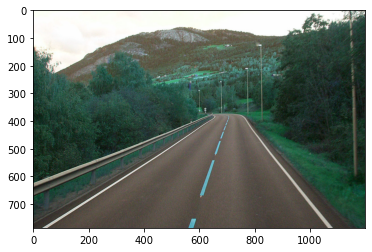

In [8]:
plt.imshow(lane_img)

In [9]:
# Converting to Grayscale with cvtColor function and RGB2GRAY parameter
gray = cv2.cvtColor(lane_img, cv2.COLOR_RGB2GRAY)

In [9]:
cv2.imshow('result_gray', gray)
# Rendering array
cv2.waitKey(0)
# imshow should be followed by waitkey function to display it in a loop

-1

In [10]:
# Reduce noise and smooth img -  Apply Gaussian blur
# Img noise can create false edges and affect edge detection
# Imperative to filter it out by smoothing 
# Smoothening uses kernels to get  average values of neighbouring values in img array
blur = cv2.GaussianBlur(gray, (5,5), 0)
cv2.imshow('result_gray_blurred', blur)
# Rendering array
cv2.waitKey(0)
# imshow should be followed by waitkey function to display it in a loop

-1

In [11]:
# Application of Canny function - Edge detection
# Canny already applies blurs with 5 by 5 kernel
# Canny applies derivate for finding our gradient difference
# Decision in made upon values between threshold
canny = cv2.Canny(blur, 50, 150)
cv2.imshow('result_gray_canny', canny)
# Rendering array
cv2.waitKey(0)
# imshow should be followed by waitkey function to display it in a loop
# plt.imshow(canny)
# Seeing strongest gradients

-1

In [12]:
# Identifying lane lines with ROI
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

In [13]:
cv2.imshow('result_gray_canny', canny(lane_img))
# Rendering array
cv2.waitKey(0)

-1

In [13]:
gray_canny = canny(lane_img)

In [14]:
# defining region of interest
def roi_sim(img):
    height = image.shape[0]
    polygons = np.array([
        [(450, height), (1100, height), (650, 300)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, (255, 255, 255))
    return mask
cv2.imshow('screen', roi_sim(canny))
cv2.waitKey(0)

-1

In [15]:
# Finding lines: Bitwise_and
# Keeping only ROI in imgs of same size and dimension
# Bitwise and of white reason doesn't affect 1111 & 1000  = 1000
# defining region of interest
def roi(img):
    height = image.shape[0]
    polygons = np.array([[(450, height), (1100, height), (700, 310)]])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, polygons, (255, 255, 255))
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img
# plt.imshow(roi(canny))

In [18]:
cv2.imshow('result_gray_canny', roi(gray_canny))
# Rendering array
cv2.waitKey(0)

-1

In [16]:
cropped_img = roi(gray_canny)

In [17]:
# Hough Transform and finding intersections in hough space
# bin - intersections - highest value for intersection - threshold - min val of intersection to decide it as line
lines = cv2.HoughLinesP(cropped_img,rho = 2,theta = 1*np.pi/180,threshold = 100,minLineLength = 40,maxLineGap = 5)
line_image = display_lines(gray_canny, lines)

# lines seems to be not intersecting well
averaged_lines = average_slope_intercept(gray_canny, lines)

In [20]:
def display_lines(image, lines):
    gray_canny = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(gray_canny, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return gray_canny

line_img = display_lines(gray_canny, lines)
line_img_optimized = display_lines(gray_canny, averaged_lines)

# combo_image = cv2.addWeighted(gray_canny, 0.8, line_img, 1, 1)
combo_image = cv2.addWeighted(gray_canny, 0.8, line_img_optimized, 1, 1)

# cv2.imshow('result_gray_canny', display_lines(gray_canny, lines))
# cv2.imshow('result_gray_canny', display_lines(gray_canny, averaged_lines))

# detected_lines = cv2.imshow('result_gray_canny', combo_image)
cv2.imshow('result_gray_canny', combo_image)
# Rendering array
cv2.waitKey(0)

-1

In [21]:
# Optimizing more of display of lines
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    
    return np.array([x1, y1, x2, y2])
def average_slope_intercept(image, lines):
    left_fit    = []
    right_fit   = []
    if lines is None:
        return None
    for line in lines:
        for x1, y1, x2, y2 in line:
            fit = np.polyfit((x1,x2), (y1,y2), 1)
            slope = fit[0]
            intercept = fit[1]
            if slope < 0: # y is reversed in image
                left_fit.append((slope, intercept))
            else:
                right_fit.append((slope, intercept))
    # add more weight to longer lines
    left_fit_average  = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line  = make_points(image, left_fit_average)
    right_line = make_points(image, right_fit_average)
    averaged_lines = [left_line, right_line]
    return averaged_lines

In [22]:
cv2.imshow('result_gray_canny', combo_image)
# Rendering array
cv2.waitKey(0)

-1

In [ ]:
cap = cv2.VideoCapture("test2.mp4")
while(cap.isOpened()):
    _, frame = cap.read()
    canny_image = canny(frame)
    cropped_canny = roi(canny_image)
    lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
    averaged_lines = average_slope_intercept(frame, lines)
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    cv2.imshow("result", combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [27]:
import cv2
import numpy as np

def make_points(image, line):
    slope, intercept = line
    y1 = int(image.shape[0])# bottom of the image
    y2 = int(y1*3/5)         # slightly lower than the middle
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return [[x1, y1, x2, y2]]

def average_slope_intercept(image, lines):
    left_fit    = []
    right_fit   = []
    if lines is None:
        return None
    for line in lines:
        for x1, y1, x2, y2 in line:
            fit = np.polyfit((x1,x2), (y1,y2), 1)
            slope = fit[0]
            intercept = fit[1]
            if slope < 0: # y is reversed in image
                left_fit.append((slope, intercept))
            else:
                right_fit.append((slope, intercept))
    # add more weight to longer lines
    if len(left_fit) and len(right_fit):
        left_fit_average  = np.average(left_fit, axis=0)
        right_fit_average = np.average(right_fit, axis=0)
        left_line  = make_points(image, left_fit_average)
        right_line = make_points(image, right_fit_average)
        averaged_lines = [left_line, right_line]
        return averaged_lines
    
def canny(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = 5
    blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
    canny = cv2.Canny(gray, 50, 150)
    return canny

def display_lines(img,lines):
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image

def region_of_interest(canny):
    height = canny.shape[0]
    width = canny.shape[1]
    mask = np.zeros_like(canny)

    triangle = np.array([[
    (200, height),
    (550, 250),
    (1100, height),]], np.int32)

    cv2.fillPoly(mask, triangle, 255)
    masked_image = cv2.bitwise_and(canny, mask)
    return masked_image


# image = cv2.imread('test_image.jpg')
# lane_image = np.copy(image)
# lane_canny = canny(lane_image)
# cropped_canny = region_of_interest(lane_canny)
# lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
# averaged_lines = average_slope_intercept(image, lines)
# line_image = display_lines(lane_image, averaged_lines)
# combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 0)

#
cap = cv2.VideoCapture("test2.mp4")
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        canny_image = canny(frame)
        cropped_canny = region_of_interest(canny_image)
        lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
        averaged_lines = average_slope_intercept(frame, lines)
        line_image = display_lines(frame, averaged_lines)
        combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
        cv2.imshow("result", combo_image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()